# Phase 3 Project Submission: SyriaTel Customer Churn Project

* Student name: ROBERT KIDAKE KALAFA
* Student pace: DSF-PT07 PART TIME
* Instructor name: WINNIE ANYOSO, SAMUEL G. MWANGI and SAMUEL KARU

![Project Image](Project.jpg)

# 1.0 Business Understanding

## 1.1 Background
In the telecommunications sector, attracting new customers is particularly tough due to fierce competition, rapid technological changes, high costs of acquisition, and the challenge of maintaining customer loyalty. To differentiate themselves, telecom companies need to provide unique services, stay ahead of technological trends and control acquisition expenses. Of the three key revenue strategies, gaining new customers, upselling existing ones and boosting retention, increasing customer retention is often the most cost-efficient and profitable. Minimizing customer churn, which is when customers switch to other providers, is essential in this competitive landscape. By concentrating on retention and tackling churn, telecom companies can improve their profitability and secure long-term success. The project focuses on identifying the reasons behind customer churn, helping telecom operators predict at-risk customers and develop strategies to keep their most valuable clients.


## 1.2 Problem Statement
SyriaTel Telecommunications has seen a notable rise in customer churn rates over the past financial period, leading to many customers moving to rival companies. In response, the marketing team at SyriaTel has taken decisive action to understand and address the causes behind this shift. They have partnered with a group of experts to create a predictive model designed to identify customers at high risk of leaving and to analyze their behavior patterns. This effort aims to tackle the urgent issue of customer attrition, which threatens SyriaTel's financial stability and revenue growth. By utilizing the insights from this predictive model, SyriaTel plans to deploy targeted retention strategies to protect their revenue and explore new opportunities for growth.

## 1.3 Objectives
* Analyze Churn Factors: Determine the key variables driving customer churn.
* Segment Customers: Identify and categorize customer groups based on their churn behavior.
* Create Predictive Model: Develop an accurate model for forecasting customer churn.
* Generate Insights: Obtain actionable insights to formulate recommendations that safeguard Syriatel's revenue.

# 2.0 Data Understanding

The dataset encompasses a range of features related to telecom customer activities, service utilization, and account details. It includes information such as the customer's state, account duration, area code, phone number, international and voicemail plans, voicemail message counts, and the total duration and charges for calls made during different times of the day. Additionally, it provides data on international calls, customer service interactions and whether or not the customer has churned (ended their service). This dataset is well-suited for developing a classifier to predict the likelihood of a customer discontinuing their relationship with SyriaTel Telecommunications.


Data Source : https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset
(https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset)

##### Dataset Feature Summary
* **state:** The customer's residing state, presumably within the U.S.
* **account length:** The duration (in days) the customer has held their account.
* **area code:** The customer's geographic area code.
* **phone number:** The customer's contact phone number.
* **international plan:** Indicates if the customer has an international calling plan (true or false).
* **voice mail plan:** Indicates if the customer has a voicemail plan (true or false).
* **number vmail messages:** The total number of voicemail messages sent by the customer.
* **total day minutes:** The total minutes spent on calls during the daytime.
* **total day calls:** The total number of calls made by the customer during the day.
* **total day charge:** The total charges incurred by the customer for daytime calls.
* __total eve minutes:__ The total minutes spent on calls during the evening.
* __total eve calls:__ The total number of calls made by the customer during the evening.
* __total eve charge:__ The total charges incurred by the customer for evening calls.
* __total night minutes:__ The total minutes spent on calls during the night.
* __total night calls:__ The total number of calls made by the customer during the night.
* __total night charge:__ The total charges incurred by the customer for night calls.
* __total intl minutes:__ The total minutes spent on international calls.
* __total intl calls:__ The total number of international calls made by the customer.
* __total intl charge:__ The total charges incurred by the customer for international calls.
* __customer service calls:__ The number of calls made by the customer to customer service.
* __churn:__ The target variable indicating whether the customer has terminated their contract (true or false).

In [225]:
# Import all the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, explained_variance_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_recall_curve, recall_score, precision_score, f1_score, accuracy_score, roc_curve, roc_auc_score, auc
from xgboost import XGBClassifier, plot_importance
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [226]:
# Load the dataset and view the first 5 columns
churn_df = pd.read_csv("syriatel_data.csv")
churn_df.head(5)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [227]:
# View the last 5 columns to check for any differences
churn_df.tail(5)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [228]:
# Checking for column features
churn_df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [229]:
# Concise summary of the dataset
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [230]:
# Shape of the dataset
churn_df.shape

(3333, 21)

In [231]:
# Summary statistics for numerical columns
churn_df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


## Observations

* The dataset contains 3,333 rows and 21 columns.
* It includes a mix of continuous and categorical features, with data types including objects, integers, floats, and booleans.
* The target variable, Churn, is of boolean type.
* A statistical summary of the numerical data is available, detailing count, median, mean, standard deviation, percentiles, as well as minimum and maximum values.

# 3.0 Data Preparation

## 3.1 Data Cleaning

This section focuses on preparing the data for exploratory data analysis (EDA) and modeling. We will examine the dataset for:

* Duplicate rows
* Missing values
* During our analysis, we will exclude phone numbers as they offer no meaningful insights.
* We will also create separate variables for numerical and categorical data types.

In [232]:
# Check for duplicate records
churn_df.duplicated().sum()

0

In [233]:
# Check missing values
churn_df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [234]:
# Dropping phone number because it lacks information about customer behavior.
churn_df = churn_df.drop('phone number', axis=1)

# Confirming we have dropped phone number
churn_df.columns

Index(['state', 'account length', 'area code', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'churn'],
      dtype='object')

In [235]:
# Categorical and numerical variables
cat_vars = []
num_vars = []

for col in churn_df.columns:
    if churn_df[col].dtype == 'object':
        cat_vars.append(col)
    else:
        num_vars.append(col)
num_vars.pop(-1)
print("-----------------------------------------------------------------")
print('Categorical variables:', cat_vars)
print("------------------------------------------------------------------")
print('Numerical variables:', num_vars)
print("------------------------------------------------------------------")

-----------------------------------------------------------------
Categorical variables: ['state', 'international plan', 'voice mail plan']
------------------------------------------------------------------
Numerical variables: ['account length', 'area code', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls']
------------------------------------------------------------------


## 3.2 Univariate Analysis

#### a. Analysis of the Target Variable "Churn"

In [236]:
# Value_count of target variable
churn_df["churn"].value_counts()

churn
False    2850
True      483
Name: count, dtype: int64

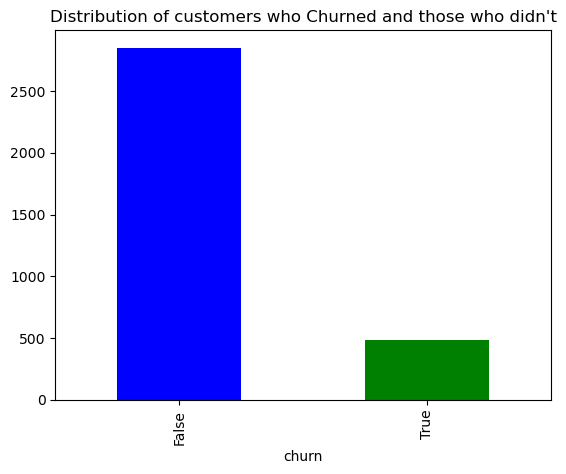

In [237]:
# Count visualization
churn_df['churn'].value_counts().plot(
    kind='bar',color=['blue', 'green']).set_title(
    "Distribution of customers who Churned and those who didn't");

In [238]:
# Check percent of current customers that have churned (True) and those that didn't (False)
churn_df["churn"].value_counts(normalize=True) * 100

churn
False    85.508551
True     14.491449
Name: proportion, dtype: float64

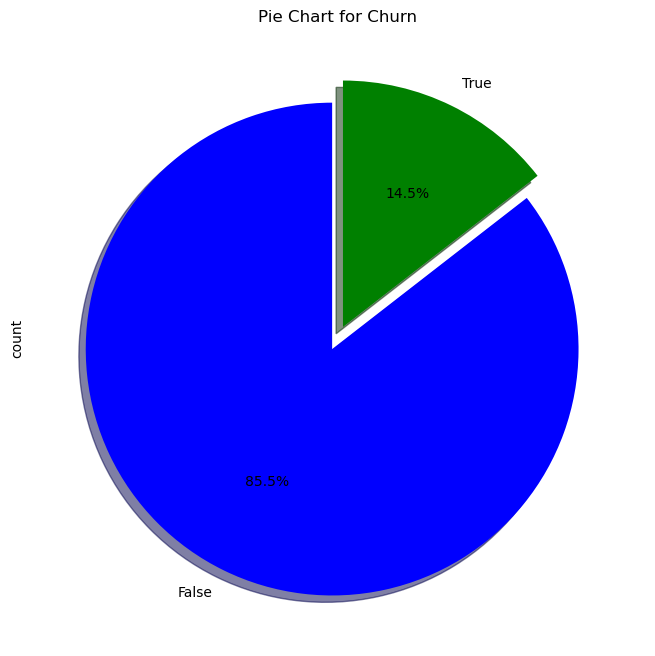

In [239]:
# To get the pie chart to analyze churn
colors = ['blue', 'green']
# Generate the pie chart with custom colors
churn_df['churn'].value_counts().plot.pie(
    explode=[0.05, 0.05], 
    autopct='%1.1f%%',  
    startangle=90,
    shadow=True,
    figsize=(8, 8),
    colors=colors  # Apply custom colors
)
# Add a title to the pie chart
plt.title('Pie Chart for Churn')
# Display the pie chart
plt.show()

The visualization above illustrates the distribution of customers with active contracts versus those who have ended their contracts.

Analyzing the target variable "churn" reveals that approximately 85% of the customers in the churn_df dataset are active, while around 14.5% are inactive.

This indicates that the dataset is predominantly composed of active customers, with a smaller proportion of inactive ones. This imbalance in class distribution needs to be addressed with suitable strategies before modeling, as an imbalanced class can lead to inaccurate predictions.


#### b. Univariate Analysis for Numerical Variables

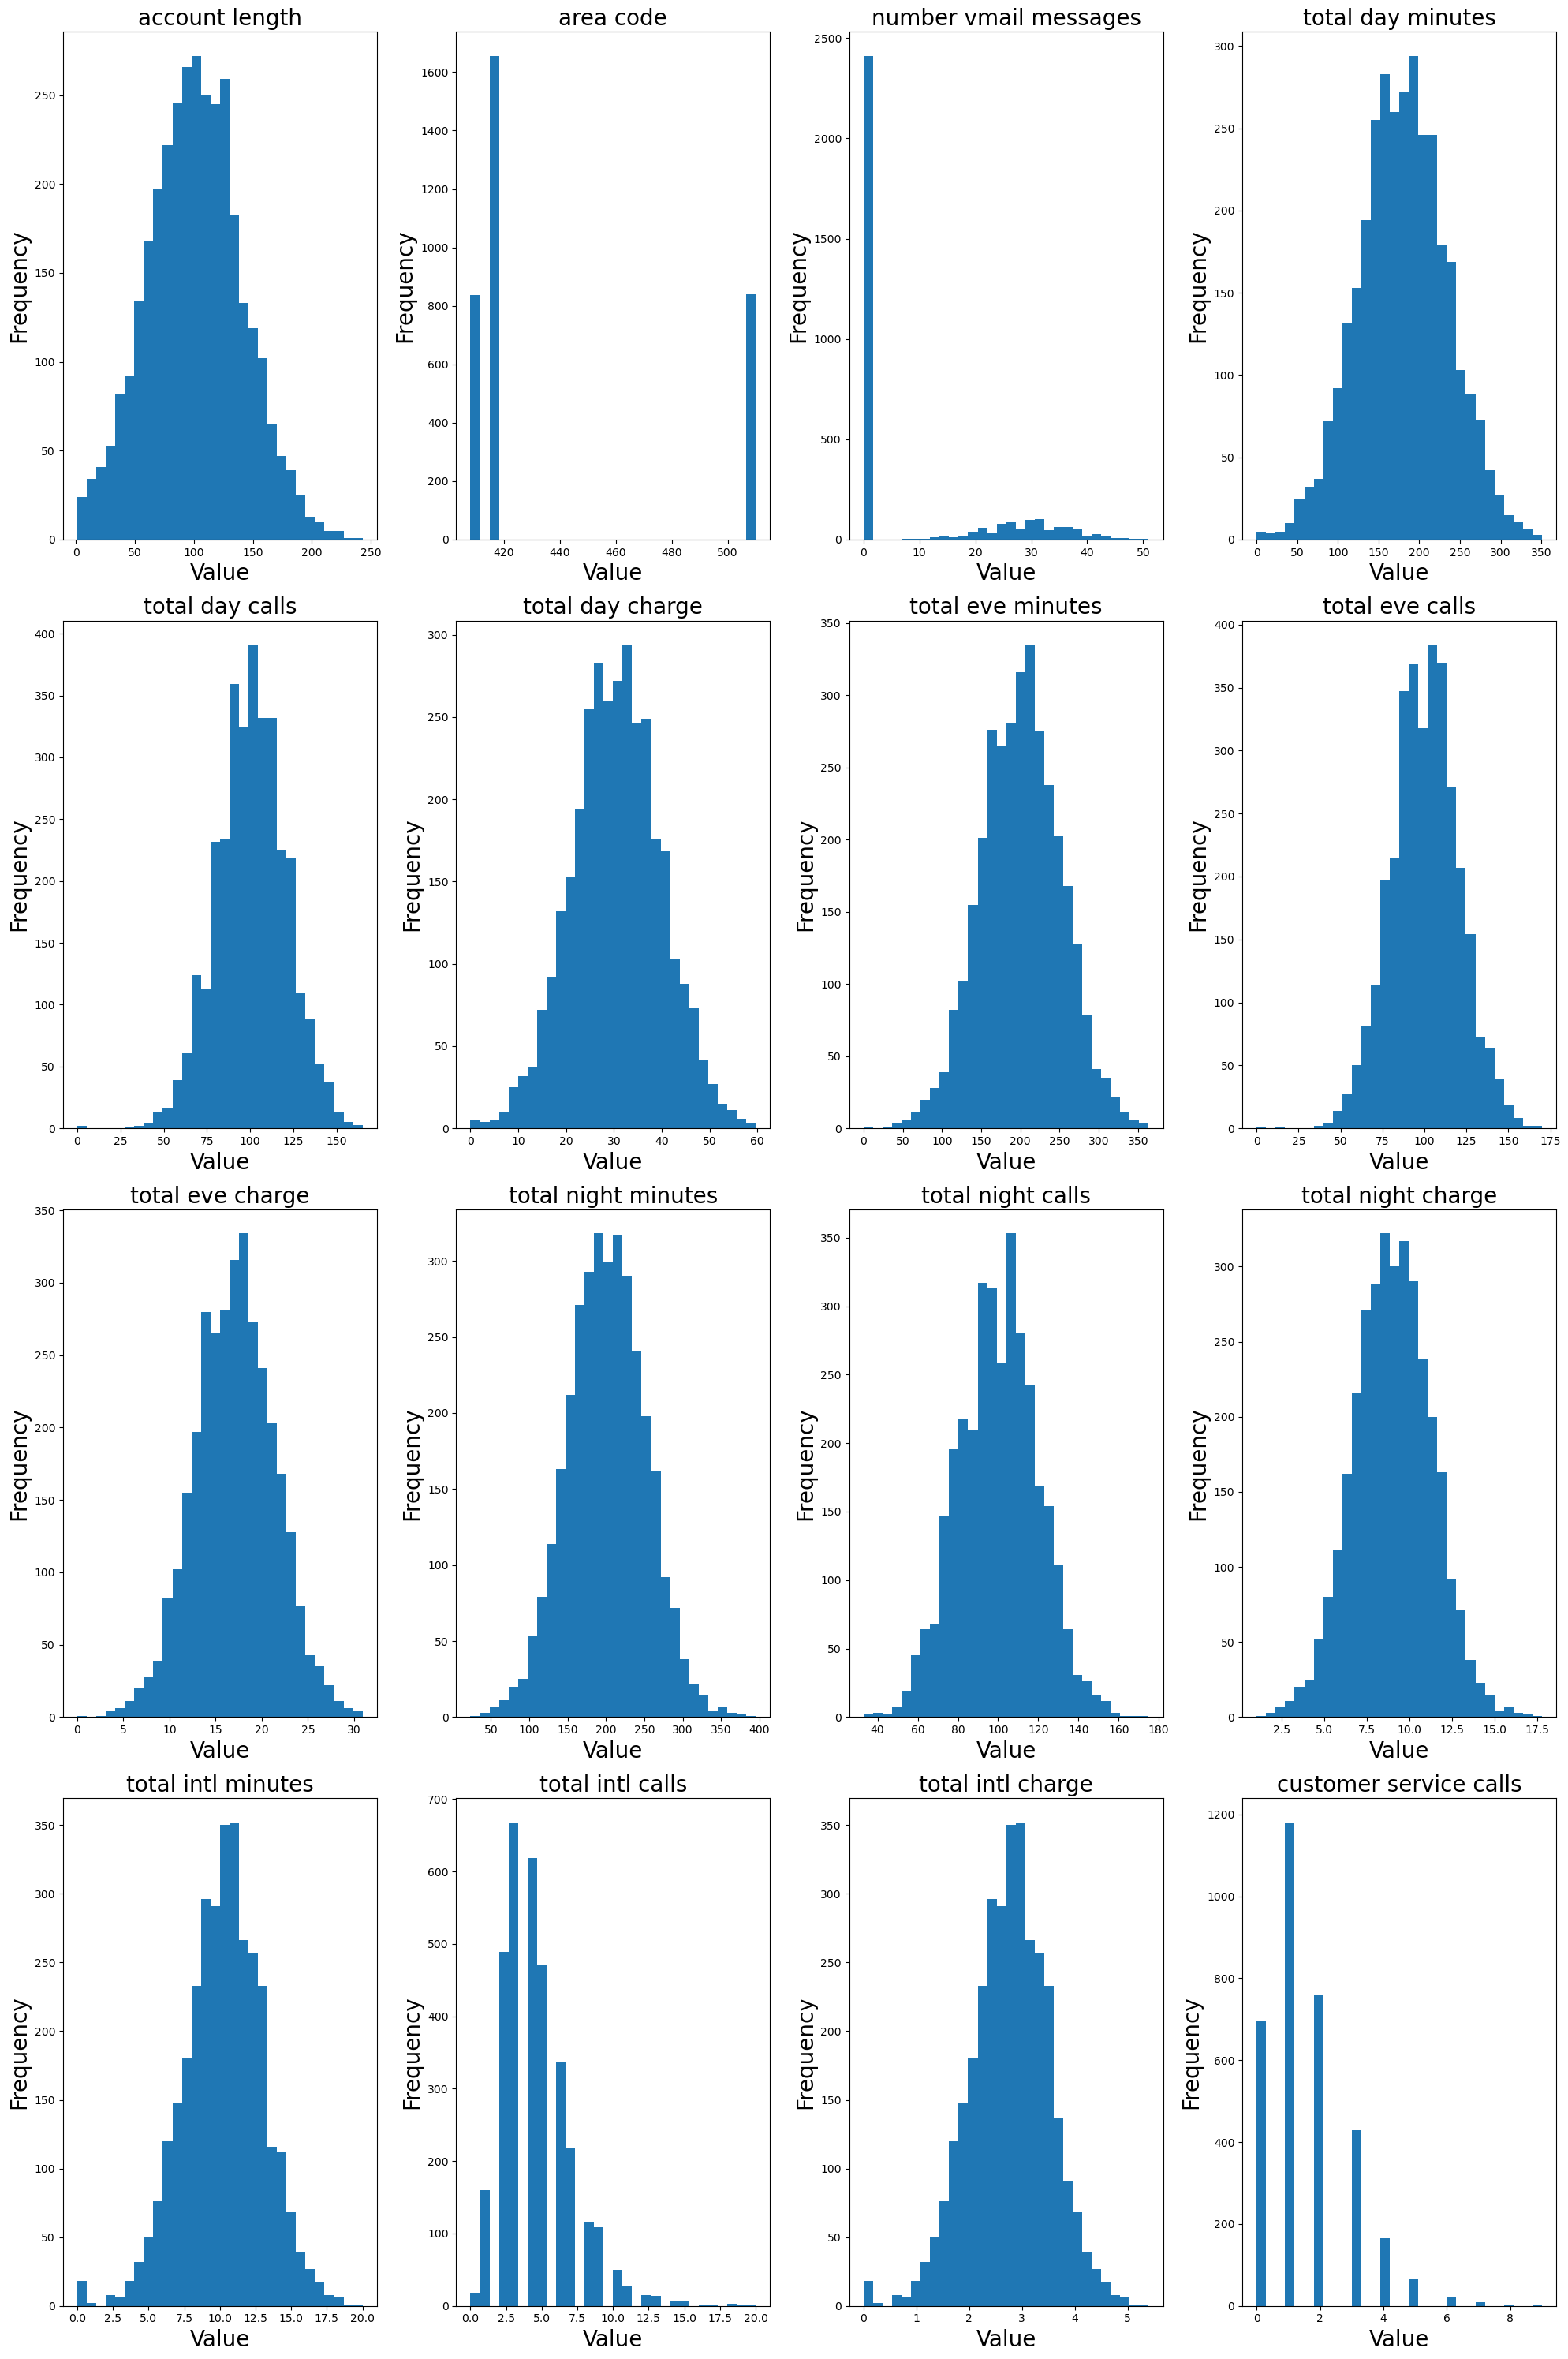

In [240]:
# Create subplots for each numerical variable
num_plots = len(num_vars)
num_rows = 4
num_cols = 4
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 30))

for i, var in enumerate(num_vars):
    row = i // num_cols
    col = i % num_cols
    axes[row, col].hist(churn_df[var], bins=30)
    axes[row, col].set_title(var,fontsize=20)
    axes[row, col].set_xlabel('Value',fontsize=20)
    axes[row, col].set_ylabel('Frequency',fontsize=20)

plt.tight_layout()
plt.show()

* Most of the features in the dataset display a normal distribution, indicating that data points are generally centered around the mean, with fewer extreme values.
* The majority of customers in the dataset have made a single customer service call.
* The highest number of customer service calls recorded is 9.
* Both international calls and customer service calls exhibit a rightward skew.

#### c. Univariate Analysis for Categorical Variables

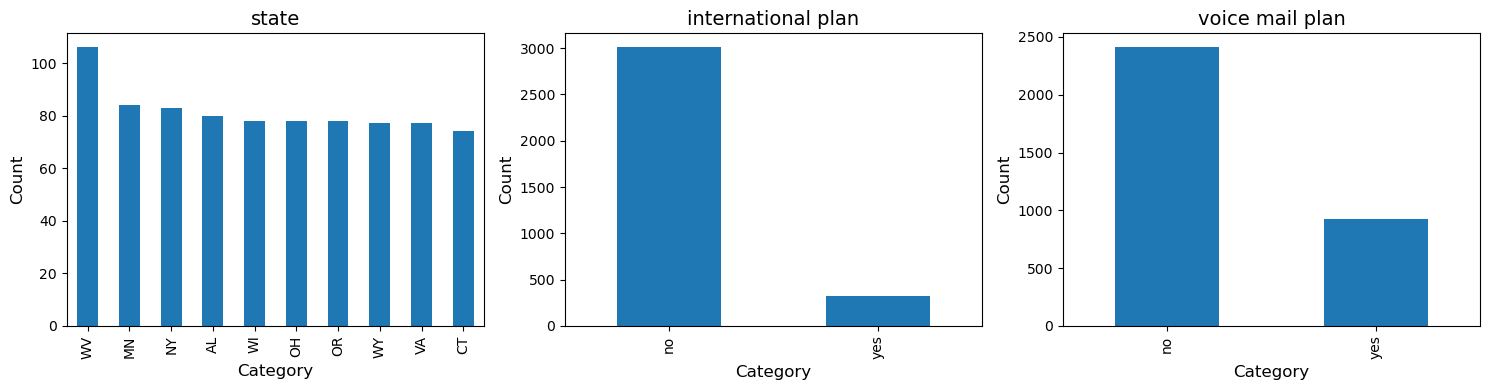

In [241]:
import matplotlib.pyplot as plt

# Determine the number of categorical variables
num_cat_vars = len(cat_vars)

# Calculate the number of rows and columns needed
num_cols = 3
num_rows = (num_cat_vars + num_cols - 1) // num_cols  # Compute the number of rows needed

# Create subplots with calculated dimensions
fig, ax = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(num_cols * 5, num_rows * 4))

# Flatten the axes array if there is more than one row
ax = ax.flatten()

# Plot each categorical variable
for i, cat_var in enumerate(cat_vars):
    top_ten_cats = churn_df[cat_var].value_counts().nlargest(10)
    top_ten_cats.plot(kind='bar', ax=ax[i])
    ax[i].set_title(cat_var, fontsize=14)
    ax[i].set_xlabel('Category', fontsize=12)
    ax[i].set_ylabel('Count', fontsize=12)

# Hide any unused subplots
for j in range(i + 1, len(ax)):
    ax[j].axis('off')

plt.tight_layout()
plt.show()


* The top five American states that syriatel operates in are West Virginia, Minnesota, New York, Alabama and Oregon respectively.
* Most customers in the dataset do not have an international plan or a voicemail plan.

## 3.3 Bivariate Analysis

#### a. Analysis of churned Customers based on International Plan

In [242]:
# Churned customers by international_plan
churn_international_plan = churn_df.groupby("international plan")["churn"].sum().reset_index()
churn_international_plan

,international plan,churn
0,no,346
1,yes,137


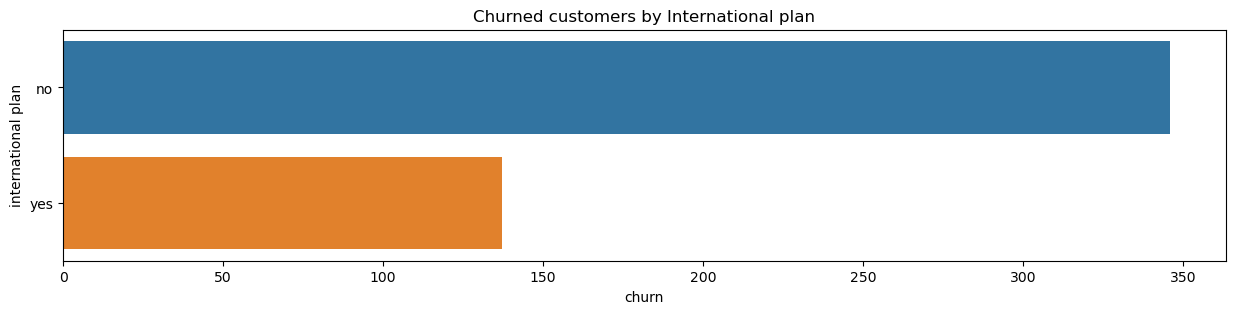

In [243]:
# Lets visualize customers who have terminated their contracts based on international plan
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 3))
sns.barplot(x = "churn", y = "international plan", data = churn_international_plan, ax=axes)
axes.set_title("Churned customers by International plan");

* Out of the 483 customers who terminated their contracts 346 did not have an international plan, while 137 had one.

In [244]:
# Calculate the International Plan vs Churn percentage
International_plan_data = pd.crosstab(churn_df["international plan"],churn_df["churn"])
International_plan_data['Percentage Churn'] = International_plan_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(International_plan_data)

churn               False  True  Percentage Churn
international plan                               
no                   2664   346         11.495017
yes                   186   137         42.414861


The comparative analysis reveals the following:

* Out of the 3010 customers who do not have an international plan, 11.4% of customers have churned.
* Out of the 323 customers who have an international plan, 42.4% of them have terminated their accounts.
* This indicates a notably higher churn rate among customers with international plans, which may be due to factors such as connectivity problems or high call costs.

#### b. Analysis of Churned Customers based on Area Code

In [245]:
# We shall look at the distribution of inactive customers based on their area code
churn_area_code = churn_df.groupby("area code")["churn"].sum().reset_index()
churn_area_code

,area code,churn
0,408,122
1,415,236
2,510,125


Text(0.5, 1.0, 'Churned customers by area code')

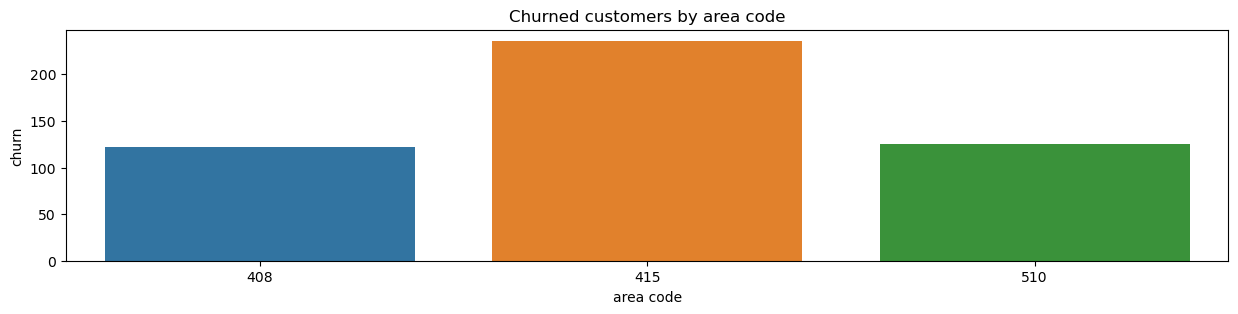

In [246]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 3))
sns.barplot(x = "area code", y = "churn", data = churn_area_code, ax=axes)
axes.set_title("Churned customers by area code")

* The area code 415 had the most customers who terminated their contract while 408 area code had the least

#### c. Analysis of Churn based on Voice Mail Plan

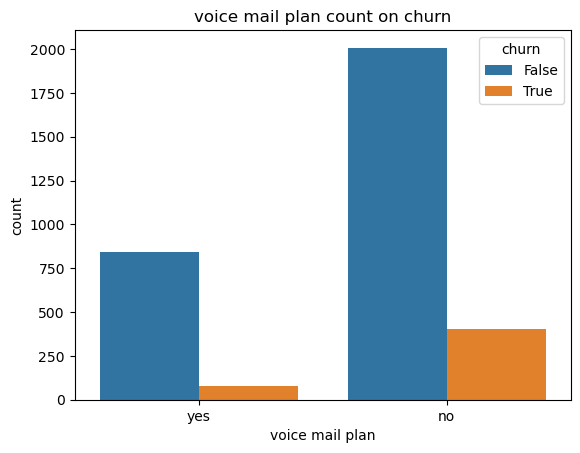

In [247]:
sns.countplot(x='voice mail plan',
              data=churn_df, hue='churn').set(title='voice mail plan count on churn');

* Majority of the customers that have terminated their contract do not have voicemail plan.
It could indicate that the voicemail plan might not be a highly desired or valued service among customers.

#### d.  Analysis of Churned based on Customer Service Calls

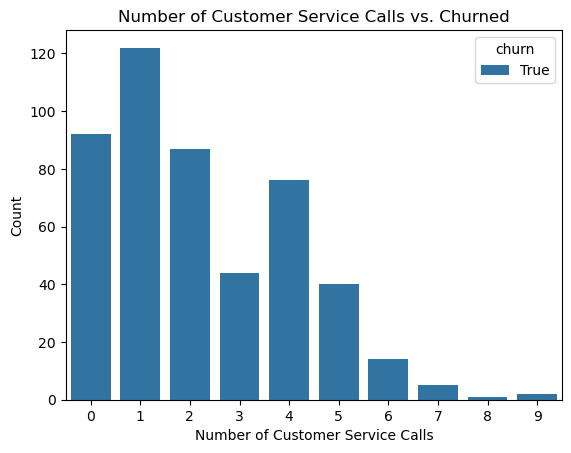

In [248]:
# Create the countplot
sns.countplot(x='customer service calls', hue='churn', data=churn_df[churn_df['churn'] == True])
# Set the title and labels
plt.title("Number of Customer Service Calls vs. Churned")
plt.xlabel("Number of Customer Service Calls")
plt.ylabel("Count")
# Show the plot
plt.show()

* The visualization above indicates that most churned customers made just one call to customer service. This suggests that many customers who left the service had minimal interaction with customer support, potentially implying that their issues or concerns were not sufficiently resolved.

#### e.  Analysis of Churn Rates based on the different States

In [249]:
# Does different states have different churn rates?
churn_rate_state = pd.DataFrame(churn_df.groupby(["state"])['churn'].mean().sort_values(ascending = False))
print(churn_rate_state)

          churn
state          
NJ     0.264706
CA     0.264706
TX     0.250000
MD     0.242857
SC     0.233333
MI     0.219178
MS     0.215385
NV     0.212121
WA     0.212121
ME     0.209677
MT     0.205882
AR     0.200000
KS     0.185714
NY     0.180723
MN     0.178571
PA     0.177778
MA     0.169231
CT     0.162162
NC     0.161765
NH     0.160714
GA     0.148148
DE     0.147541
OK     0.147541
OR     0.141026
UT     0.138889
CO     0.136364
KY     0.135593
SD     0.133333
OH     0.128205
FL     0.126984
IN     0.126761
ID     0.123288
WY     0.116883
MO     0.111111
VT     0.109589
AL     0.100000
NM     0.096774
ND     0.096774
WV     0.094340
TN     0.094340
DC     0.092593
RI     0.092308
WI     0.089744
IL     0.086207
NE     0.081967
LA     0.078431
IA     0.068182
VA     0.064935
AZ     0.062500
AK     0.057692
HI     0.056604


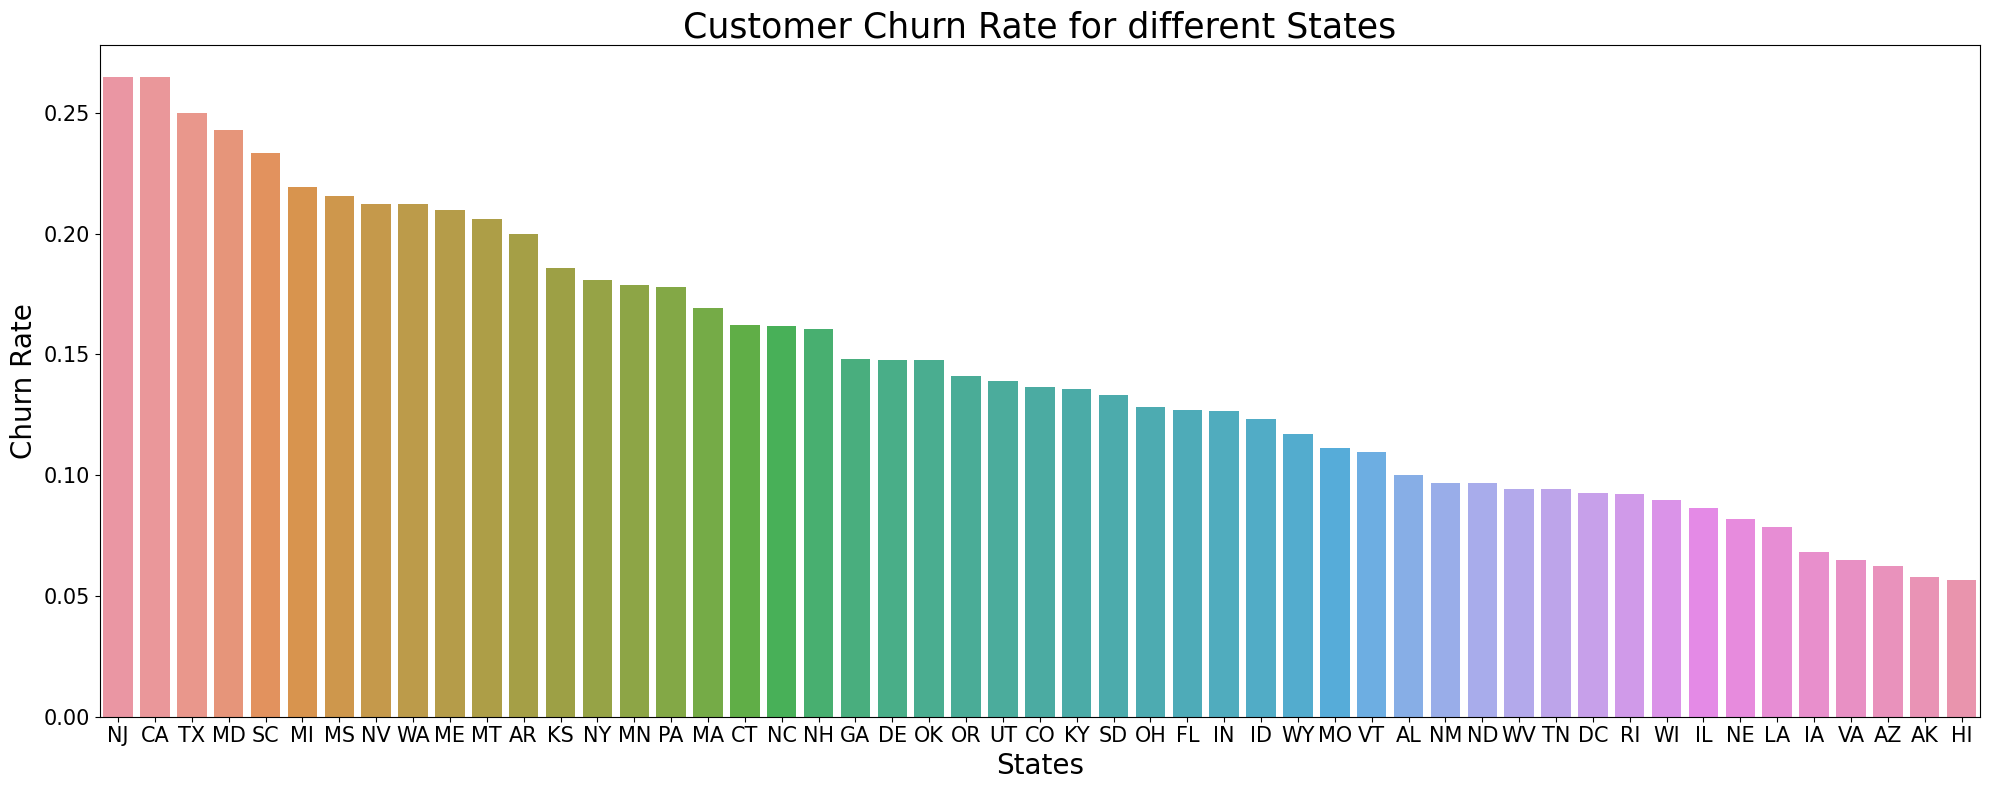

In [250]:
# Visualization of the churn rates for states
fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(x = np.linspace(0, len(churn_rate_state)-1, len(churn_rate_state), endpoint=True),
            y = 'churn', data = churn_rate_state , ax = ax)
plt.title('Customer Churn Rate for different States', fontsize = 25)
ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('States', fontsize = 20)
plt.ylabel('Churn Rate', fontsize = 20)
ax.set_xticklabels(churn_rate_state.index)
plt.tight_layout()

The visualization above reveals varying churn rates across different states. California and New Jersey have the highest churn rates, exceeding 25%, whereas Alaska and Hawaii have the lowest churn rates, both below 6%.

## 3.4 Multivariate Analysis

#### a. Churn Analysis - Total calls vs. Total charges by Time Period

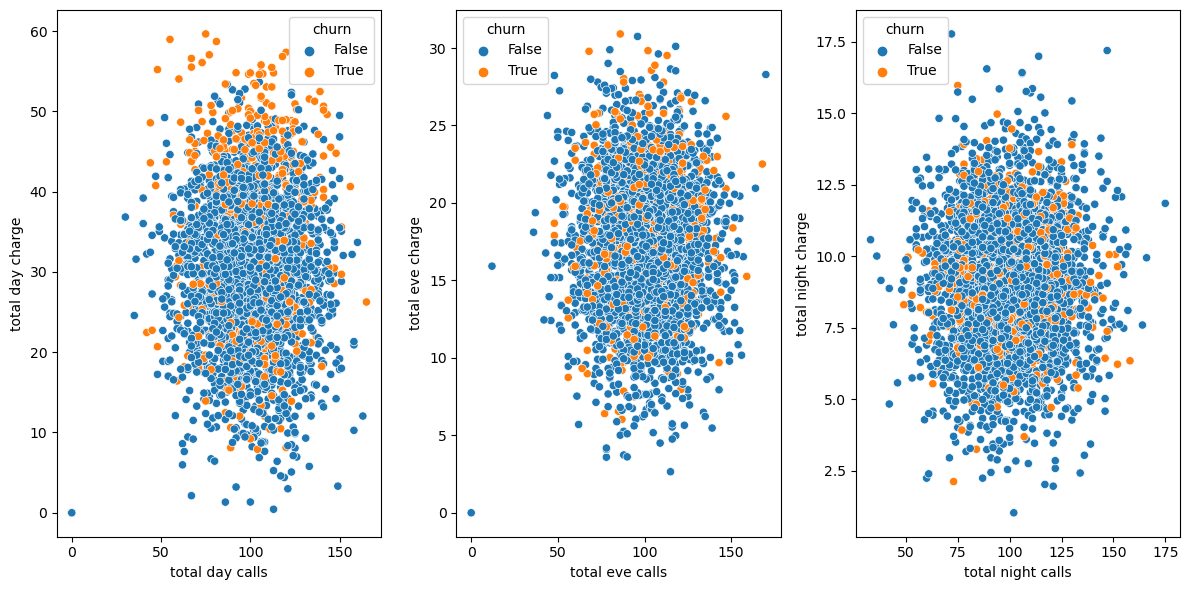

In [251]:
# Lets visualize the performance of calls 
features = [
    ('total day calls', 'total day charge'),
    ('total eve calls', 'total eve charge'),
    ('total night calls', 'total night charge')
]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))

for i, (x, y) in enumerate(features):
    ax = axes[i]  # Access the corresponding axis from the 1x3 grid
    sns.scatterplot(x=x, y=y, data=churn_df, hue='churn', ax=ax)
    ax.set_xlabel(x)
    ax.set_ylabel(y)

plt.tight_layout()
plt.show()

From the visualization above, we can make the following observations:
* Daytime calls incur significantly higher charges compared to evening and nighttime calls across all periods.
* This suggests that daytime is likely considered a peak period, resulting in elevated charges.
* The call charges for daytime, evening, and nighttime are higher even with fewer calls made. This may indicate that calls are also charged on duration and not necessarily the number of calls.

#### b. Churn Analysis - Total Minutes vs. Total Charges by Time Period

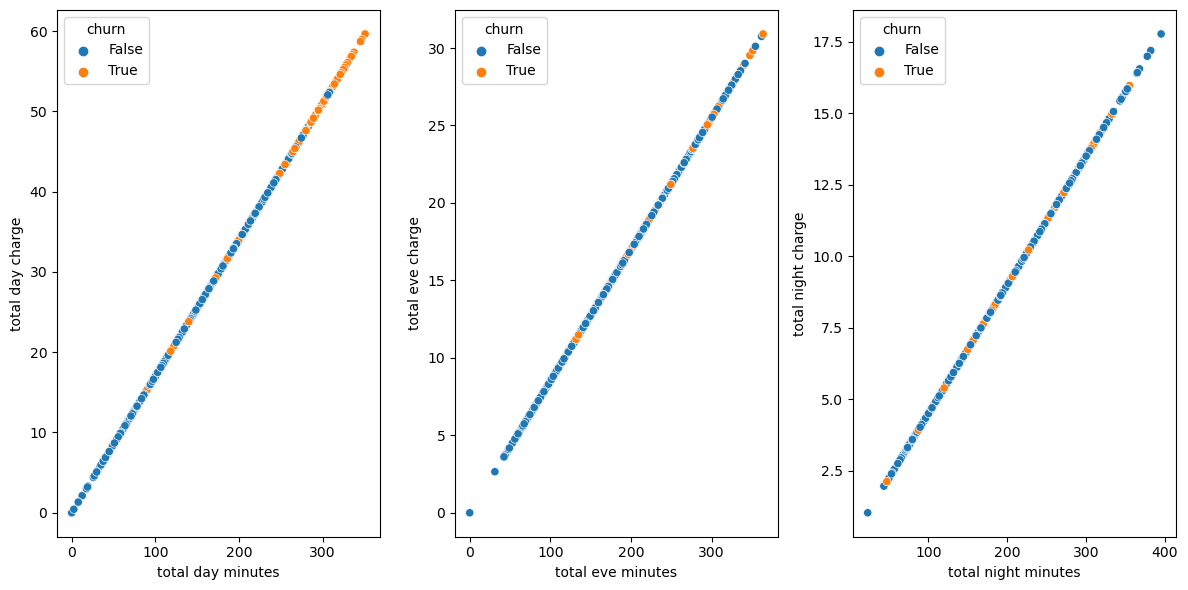

In [252]:
# Lets visualize minutes performance
features = [
    ('total day minutes', 'total day charge'),
    ('total eve minutes', 'total eve charge'),
    ('total night minutes', 'total night charge')
]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))

for i, (x, y) in enumerate(features):
    ax = axes[i]  # Access the corresponding axis from the 1x3 grid
    sns.scatterplot(x=x, y=y, data=churn_df, hue='churn', ax=ax)
    ax.set_xlabel(x)
    ax.set_ylabel(y)

plt.tight_layout()
plt.show()

* Daytime minutes are charged substantially more than evening and nighttime minutes across all periods.
* This suggests that daytime is regarded as peak hours, resulting in increased charges.
* There is a linear correlation between the total minutes of daytime, evening, and nighttime calls and the associated charges, indicating that higher usage results in higher costs.
* Customers who have canceled their accounts typically had a higher subscription to daytime minutes, leading to greater charges on average.

#### c. Churn Analysis - Total International Calls and Minutes vs. Total International Charges 

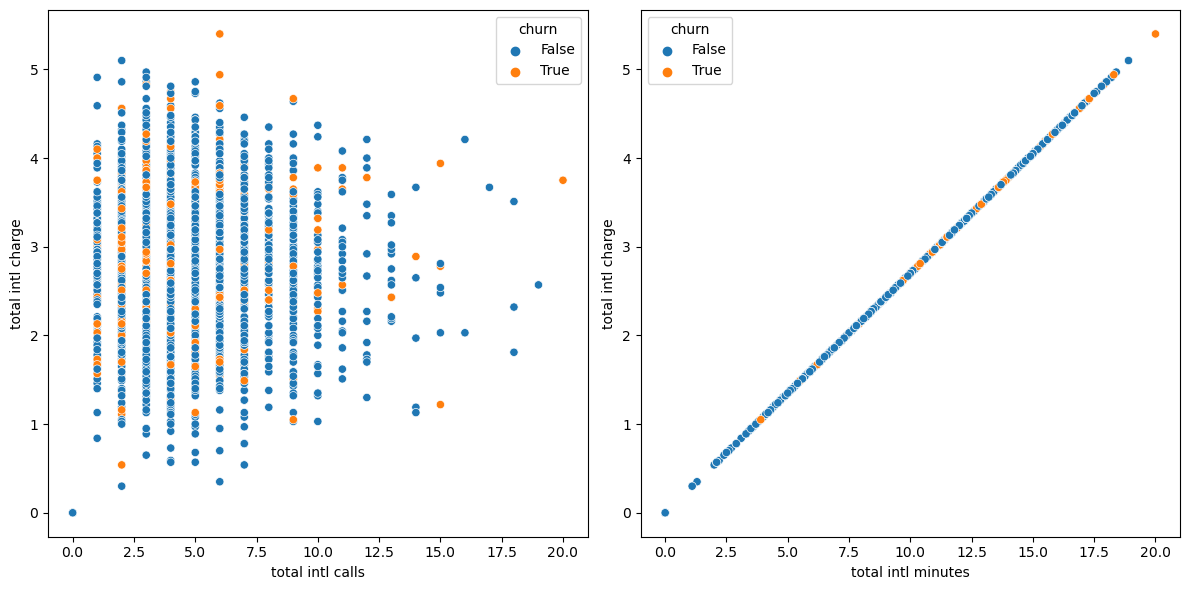

In [253]:
# Lets visualize performance of international services
features = [
    ('total intl calls', 'total intl charge'),
    ('total intl minutes', 'total intl charge')
]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))  # 1 row, 2 columns for the two subplots

for i, (x, y) in enumerate(features):
    ax = axes[i]  # Access the corresponding axis from the 1x2 grid
    sns.scatterplot(x=x, y=y, data=churn_df, hue='churn', ax=ax)
    ax.set_xlabel(x)
    ax.set_ylabel(y)

plt.tight_layout()
plt.show()

* A linear relationship exists between the total international minutes and the associated charges, suggesting that increased usage results in higher costs.
* Call charges appear elevated even with fewer calls, implying that international calls might be billed based on duration rather than the number of calls.

#### d. Churn Analysis - Total Minutes and Total Charges

In [254]:
# Total minutes during the period
churn_df['total_calls'] = (churn_df['total day calls'] + churn_df['total eve calls'] + churn_df['total night calls'])
# total charge during the period
churn_df['total_charges']= (churn_df['total day charge'] + churn_df['total eve charge'] +
                 churn_df['total night charge'] + churn_df['total intl charge'])
#total minutes during the period
churn_df['total_minutes']= (churn_df['total day minutes'] +churn_df['total eve minutes'] +
             churn_df['total night minutes'])

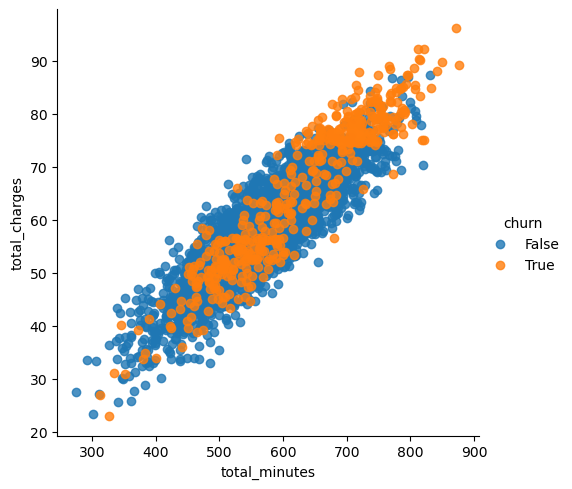

In [255]:
# Visualization of churn performance for total minutes and charges
# Plot the lmplot
sns.lmplot(x='total_minutes', y='total_charges', data=churn_df, hue='churn', fit_reg=False);

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="seaborn.axisgrid")

* There is a linear correlation between the total minutes and the total charge, meaning that as the number of subscribed minutes increases, so does the charge.
* We can also observe that customers who have terminated their accounts tend to subscribe to higher minutes, resulting in a higher charge.

#### e. Churn Analysis - Total Calls and Total Charges 

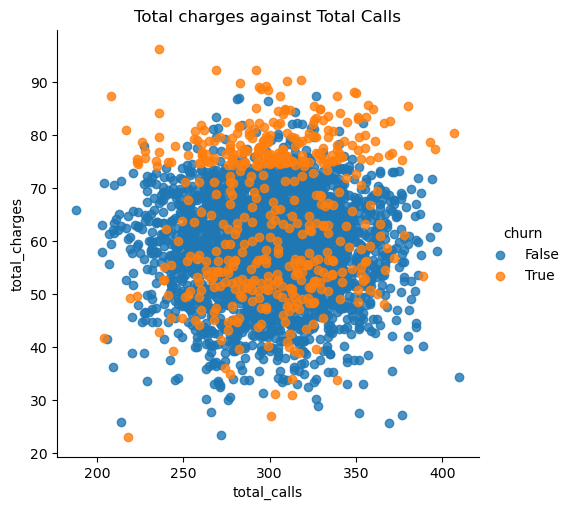

In [256]:
#visualizing this performance
sns.lmplot(x='total_calls',
           y='total_charges',
           data=churn_df, hue='churn', fit_reg=False).set(title='Total charges against Total Calls');
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="seaborn.axisgrid")

It is quite surprising that customers with a lower total number of calls tend to have higher charges, and a significant number of these high charges are associated with customers who have terminated their accounts.

In [257]:
# Drop the comparsion columns as they will not be included in our model
churn_df = churn_df.drop(columns = ['total_calls','total_charges','total_minutes'], axis=1)

#### f. Visualization of Correlation Heatmap

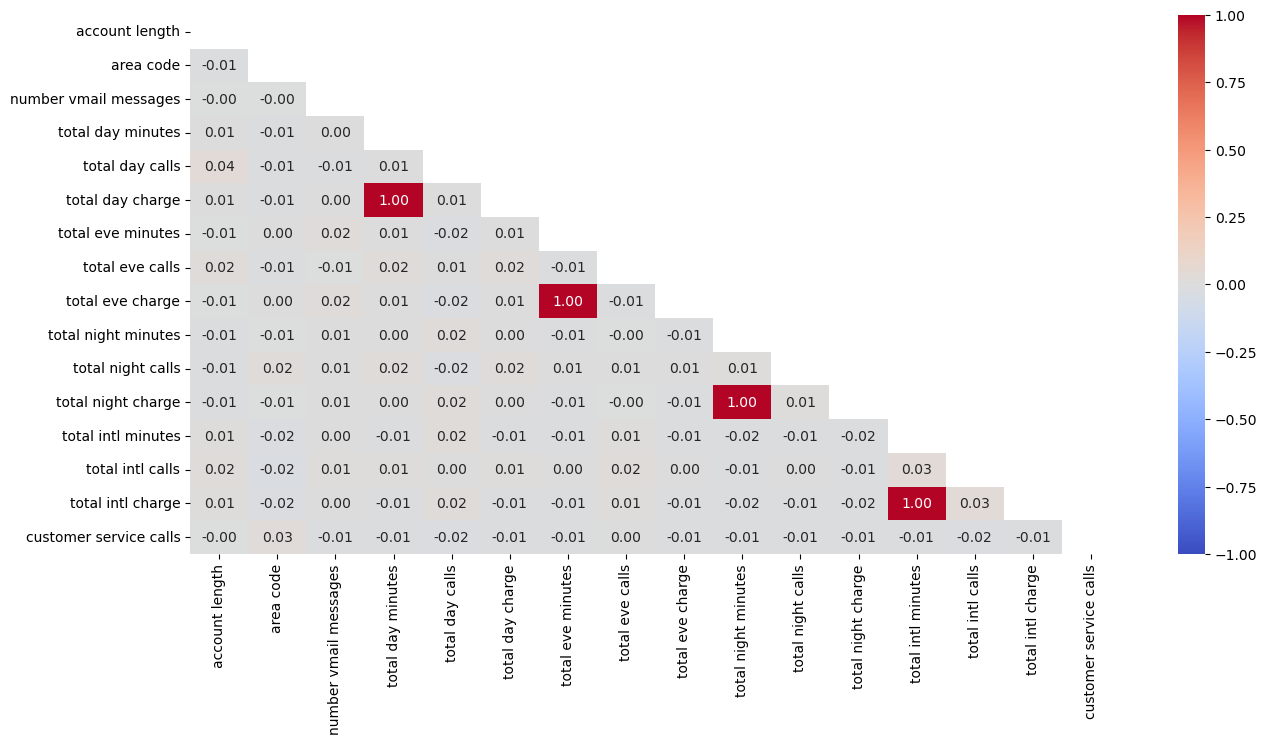

In [258]:
# Select only numeric columns from the DataFrame
numeric_df = churn_df.select_dtypes(include=[np.number])
# Calculate the correlation matrix
corr_matrix = numeric_df.corr()
# Generate a mask to hide the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(15, 7))
sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="coolwarm", mask=mask)
plt.show()

In [259]:
# Checking the correlation between target variable and other features
if churn_df['churn'].dtype == 'bool':
    churn_df['churn'] = churn_df['churn'].astype(int)
# Select numeric columns including 'churn'
numeric_churn_df = churn_df.select_dtypes(include=[np.number])
# Calculate the correlation matrix
correlation_with_target = numeric_churn_df.corr()['churn'].sort_values(ascending=False)
print(correlation_with_target)


churn                     1.000000
customer service calls    0.208750
total day minutes         0.205151
total day charge          0.205151
total eve minutes         0.092796
total eve charge          0.092786
total intl charge         0.068259
total intl minutes        0.068239
total night charge        0.035496
total night minutes       0.035493
total day calls           0.018459
account length            0.016541
total eve calls           0.009233
area code                 0.006174
total night calls         0.006141
total intl calls         -0.052844
number vmail messages    -0.089728
Name: churn, dtype: float64


* From the above correlation heatmap, we can see high multicollinearity of total day charge & total day minute, total evening charge & total evening minute, total night charge & total night minute with a value of 1.
* Customer service call is positively correlated with only area code among the features and negatively correlated with rest of the variables.
* The analysis reveals that, among the numerical features, the top 5 most strongly correlated with churn are:
1. Customer service calls
2. Total day minutes and charges
3. Total evening minutes and charges
4. Total international minutes and charges
5. Total night minutes and charges

## 3.5 Preprocessing

In [260]:
# Get a copy of the churn dataset and view 
churn_df_copy = churn_df.copy()
churn_df_copy

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,WV,68,415,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,RI,28,510,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,CT,184,510,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


In [261]:
# Converting churn column from boolean to integer
churn_df_copy['churn'] = churn_df_copy['churn'].astype(int)

In [262]:
# Dropping states column as it will not impact our modelling part
churn_df_copy = churn_df_copy.drop('state', axis=1)

In [263]:
# Creating dummy variables
churn_df_copy= pd.get_dummies(churn_df_copy, drop_first=True)
churn_df_copy.head()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,international plan_yes,voice mail plan_yes
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,False,True
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,False,True
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,False,False
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,True,False
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,True,False


#### a. Defining the Predictor and Target Variables

In [264]:
# Define our X and y variables
X = churn_df_copy.drop (columns = ['churn'], axis=1)
y = churn_df_copy['churn']

In [265]:
# For consistency of results set a random seed
np.random.seed(123)
# Performing a train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)

In [266]:
# Scale the data
# Initialize the scaler
scaler = StandardScaler()

# Fit the data on the scaler
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### b. Fixing the Class Imbalance

In [267]:
# Previous original class distribution
print(y_train.value_counts())

churn
0    2141
1     358
Name: count, dtype: int64


In [268]:
# Use Smote to resample and fix the class imbalance problem
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

We used SMOTE class in order to improve the model's performance on the minority class.

In [269]:
# Preview synthetic sample class distribution
print(pd.Series(y_train_resampled).value_counts())

churn
0    2141
1    2141
Name: count, dtype: int64


The imbalance on the target variable is now resolved.

# 4.0 Modeling
We will proceed to develop a model to predict customer churn using the following algorithms:
* Logistic Regression
* Decision Tree
* Random Forest
* XG Boost

#### Model 1 : Logistics Regression Classifier

In [270]:
# Instanstiate the model
logreg = LogisticRegression(random_state =42)
# fit the model
logreg.fit(X_train_resampled, y_train_resampled)
#predicting on the test
y_pred_log = logreg.predict(X_test_scaled)

In [271]:
def plot_confusion_matrix(y_true, y_pred, classes):
    """
    Plots a confusion matrix.
    """
    cm = confusion_matrix(y_true, y_pred)
    plt.figure()
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

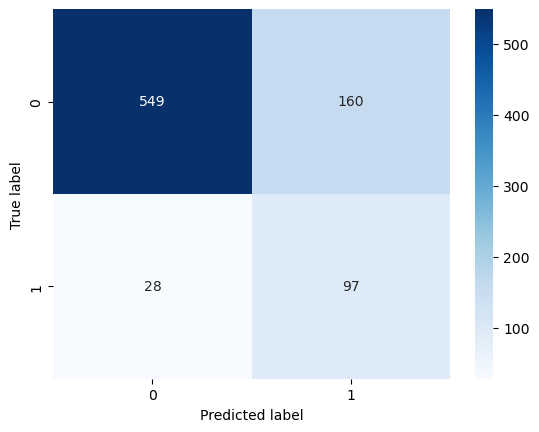

In [272]:
# Visualizing confusion matrix
plot_confusion_matrix(y_test, y_pred_log, [0,1])

In [273]:
# Displaying scores
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

           0       0.95      0.77      0.85       709
           1       0.38      0.78      0.51       125

    accuracy                           0.77       834
   macro avg       0.66      0.78      0.68       834
weighted avg       0.87      0.77      0.80       834



**Logistics Regression Observations**

Recall measures the model's effectiveness in identifying customers who are likely to churn (positive instances) among those who actually churned.
* For class 0, representing customers who did not churn, the recall is 0.77. This indicates that the model accurately identified 77% of the customers who did not churn from the total number of non-churning customers.
* For class 1, representing customers who did churn, the recall is 0.78, meaning the model correctly identified 78% of the churned customers from the total number of customers who actually churned.

The accuracy of 0.77 signifies that the model correctly classified 77% of all customers.

#### Model 2: Decision Tree Classifier

In [274]:
# Instanstiate a DT classifier
clf = DecisionTreeClassifier(random_state=42)

# fit DT classifier
clf.fit(X_train_resampled, y_train_resampled)

# Make predictions for test data
y_pred_clf = clf.predict(X_test_scaled)

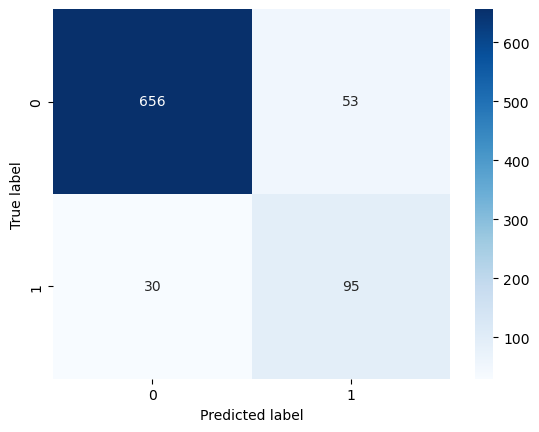

In [275]:
# Plotting a confusin matrix
plot_confusion_matrix(y_test, y_pred_clf, [0,1])

In [276]:
print(classification_report(y_test,y_pred_clf))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       709
           1       0.64      0.76      0.70       125

    accuracy                           0.90       834
   macro avg       0.80      0.84      0.82       834
weighted avg       0.91      0.90      0.90       834



**Decision Tree Classifier Observations**

Recall:
* For class 0, representing customers who did not churn, the recall is 0.93. This indicates that the model correctly identified 93% of non-churning customers from the total number who did not churn. 
* For class 1, representing customers who did churn, the recall is 0.76, meaning the model successfully identified 76% of churned customers from the total number who actually churned.

Accuracy: The accuracy of 0.90 means that 90% of all customers were correctly classified. This model outperforms the logistic regression model.

#### Model 3: Random Forest Classifier

In [277]:
# Instanstiate a DT classifier
rfc = RandomForestClassifier(random_state=42)

# Fit RFCclassifier
rfc.fit(X_train_resampled, y_train_resampled)

# Make predictions for test data
y_pred_rfc = rfc.predict(X_test_scaled)


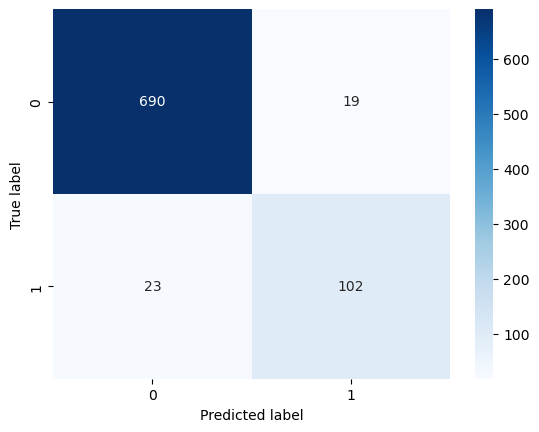

In [278]:
plot_confusion_matrix(y_test, y_pred_rfc, [0,1])

In [279]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       709
           1       0.84      0.82      0.83       125

    accuracy                           0.95       834
   macro avg       0.91      0.89      0.90       834
weighted avg       0.95      0.95      0.95       834



**Random Forest Classifier Observations**

Recall:
* For class 0, representing customers who did not churn, the recall is 0.97. This indicates that the model accurately identified 97% of customers who did not churn from the total number who actually did not churn. 
* For class 1, representing customers who churned, the recall is 0.82, meaning the model successfully identified 82% of churned customers from the total number who actually churned.

Accuracy: With an accuracy of 0.95, the model correctly classified 95% of all customers, outperforming the Decision Tree Classifier model.

#### Model 4: XGBoost

In [280]:
# Instanstiate the model
x_gb = XGBClassifier(random_state=42)

# fit XGB classifier
x_gb.fit(X_train_resampled, y_train_resampled)

# Make predictions for test data
y_pred_xgb = x_gb.predict(X_test_scaled)

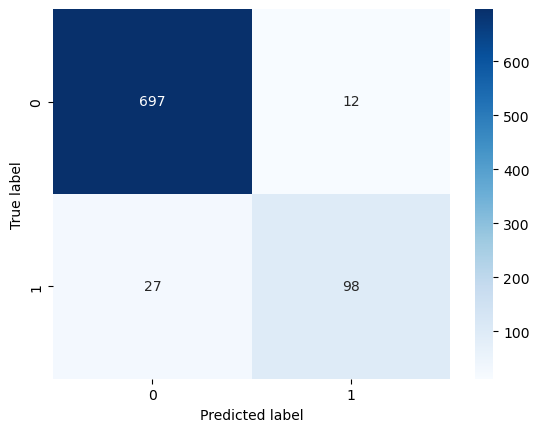

In [281]:
plot_confusion_matrix(y_test, y_pred_xgb, [0,1])

In [282]:
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       709
           1       0.89      0.78      0.83       125

    accuracy                           0.95       834
   macro avg       0.93      0.88      0.90       834
weighted avg       0.95      0.95      0.95       834



**XGBoost Classifier Observations**

Recall:
* For class 0, representing customers who did not churn, the recall is 0.98. This indicates that the model accurately identified 98% of customers who did not churn out of the total number who actually did not churn.
* For class 1, representing customers who churned, the recall is 0.78, meaning the model correctly identified 78% of churned customers from the total number who actually churned.

Accuracy: With an accuracy of 0.95, the model correctly classified 95% of all customers. Its performance is comparable to that of the Random Forest Classifier model.

# 5.0 Model Evaluation

### 5.1 Model Comparison

In [283]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score

# List of classifiers to evaluate
classifiers = [LogisticRegression(),
               RandomForestClassifier(),
               DecisionTreeClassifier(),
               XGBClassifier()]

# Initialize an empty list to store results
results = []

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    # Append results as a dictionary to the results list
    results.append({'classifiers': cls.__class__.__name__,
                    'accuracy': accuracy, 'recall': recall})

# Create a DataFrame from the results list
result_table = pd.DataFrame(results)

# Set the name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

print(result_table)

                        accuracy  recall
classifiers                             
LogisticRegression      0.774580   0.776
RandomForestClassifier  0.954436   0.832
DecisionTreeClassifier  0.894484   0.744
XGBClassifier           0.953237   0.784


* All the models are able to predict well, however, Random Forest Classifier and XGBoost Classier have the highest accuracy and recall scores.

* We shall proceed and tune Random Forest Classifier and XGBost classifier hyperparameters and compare the results.

#### ROC

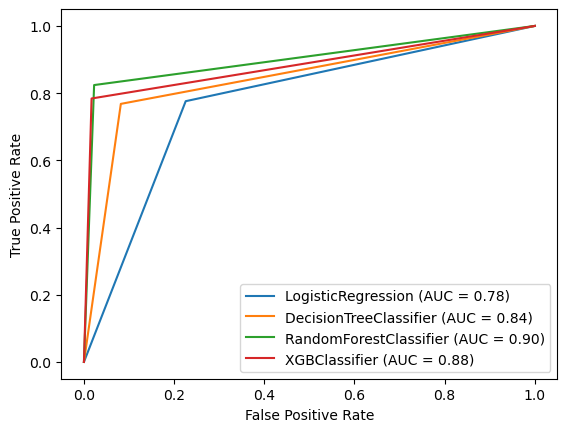

In [284]:
# Get the ROC curves for all classifiers
classifiers = ["LogisticRegression", "DecisionTreeClassifier", "RandomForestClassifier", "XGBClassifier"]
roc_curves = []

for classifier_name in classifiers:
    if classifier_name == "LogisticRegression":
        classifier = LogisticRegression()
    elif classifier_name == "DecisionTreeClassifier":
        classifier = DecisionTreeClassifier()
    elif classifier_name == "RandomForestClassifier":
        classifier = RandomForestClassifier()
    elif classifier_name == "XGBClassifier":
        classifier = XGBClassifier()

    classifier.fit(X_train_resampled, y_train_resampled)
    y_pred = classifier.predict(X_test_scaled)
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    roc_curves.append((fpr, tpr, roc_auc, classifier_name))

# Plot the ROC curves and print AUC values
plt.figure()
for fpr, tpr, roc_auc, classifier_name in roc_curves:
    plt.plot(fpr, tpr, label=f'{classifier_name} (AUC = {roc_auc:.2f})')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

* XGB Classifier and RandomForestClassifier are producing better results in model 4 and model 3 respectively.
* The AUC value for model 3: RandomForest is 0.88 and Model 4: XGBoost is 0.88
* Lets perform hyperparameter tuning to improve them.

### 5.2  Hyperparameter Tuning for Our Best Models

#### 1. Tuned RandomForestClassifier`

In [285]:
# Create a parameter grid with reduced values
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

# Create a grid search object
rfc = RandomForestClassifier()
grid_search = GridSearchCV(rfc, param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Fit the grid search object
grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best parameters
print(grid_search.best_params_)

{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [286]:
# Instanstiate a  RandomForest classifier
rfc_tune = RandomForestClassifier(max_depth=10, 
                                  min_samples_leaf=1, 
                                  min_samples_split=2,
                                  n_estimators=200,
                                  random_state=42)

# fit RFCclassifier
rfc_tune.fit(X_train_resampled, y_train_resampled)

# Make predictions for test data
y_pred_rfc_tune = rfc_tune.predict(X_test_scaled)

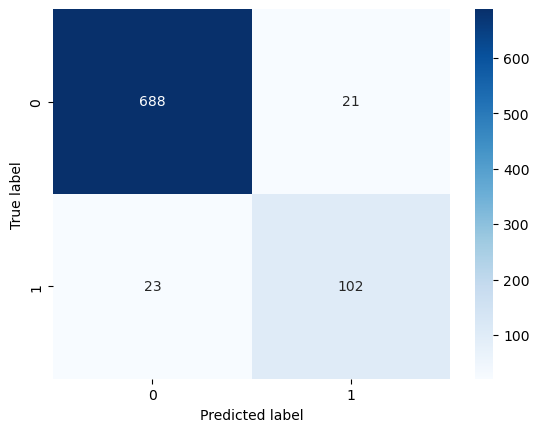

In [287]:
plot_confusion_matrix(y_test, y_pred_rfc_tune, [0,1])

In [288]:
print(classification_report(y_test,y_pred_rfc_tune))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       709
           1       0.83      0.82      0.82       125

    accuracy                           0.95       834
   macro avg       0.90      0.89      0.90       834
weighted avg       0.95      0.95      0.95       834



##### ROC curve

RNN roc_value: 0.8835373765867419
ROC for the test dataset 88.4%


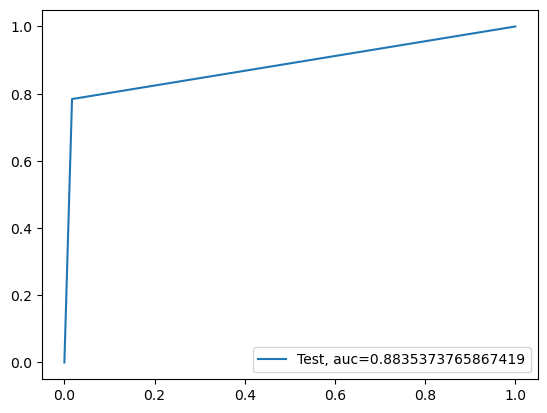

In [289]:
# Make predictions
y_prob = x_gb.predict(X_test_scaled)
y_pred = (y_prob > 0.5).astype(int)

# Calculate evaluation metrics
roc_value = roc_auc_score(y_test, y_prob)
print("RNN roc_value: {0}" .format(roc_value))
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
threshold = thresholds[np.argmax(tpr-fpr)]

roc_auc = auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr, tpr, label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

#### Checking for Overfiting

In [290]:
# Make predictions for test data
y_train_pred_rfc = rfc_tune.predict(X_train_resampled)
y_test_pred_rfc = rfc_tune.predict(X_test_scaled)

# Calculate accuracy on the training and test data
train_accuracy = accuracy_score(y_train_resampled, y_train_pred_rfc)
test_accuracy = accuracy_score(y_test, y_test_pred_rfc)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.9673049976646427
Test Accuracy: 0.947242206235012


**Tuned Random Forest Classifier Observations**

Recall:
* For class 0, representing customers who did not churn, the recall is 0.97. This indicates that the model successfully identified 97% of the customers who did not churn from the total number who actually did not churn.
* For class 1, representing customers who churned, the recall is 0.82, meaning the model accurately identified 82% of the customers who churned out of those who actually churned.

Accuracy: At 0.95, the model correctly classified 95% of all customers. It demonstrates superior performance compared to the Decision Tree Classifier model.

##### Important Features for RandomForest Model

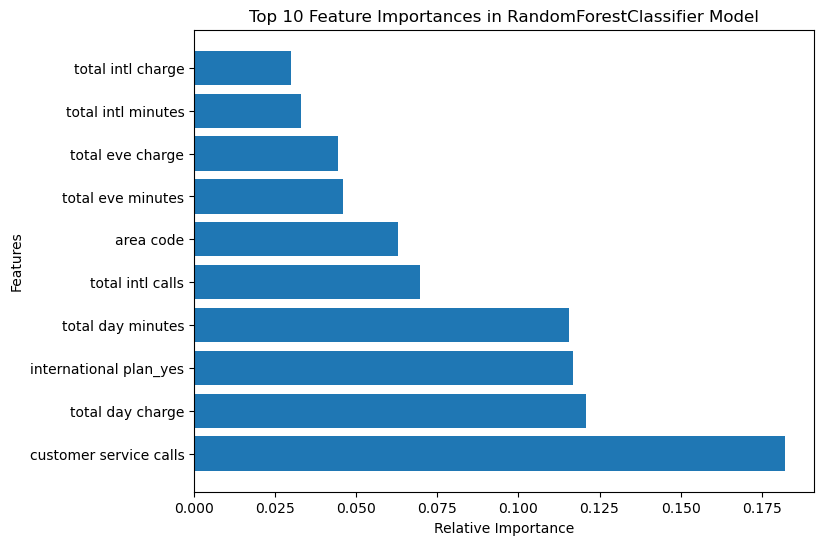

In [291]:
# Assuming 'churn' is the target column, and you want to remove it from churn_df_copy
# You can create a new DataFrame without the 'churn' column
churn_df_copy_without_churn = churn_df_copy.drop('churn', axis=1)

# Get the feature importances from the XGBoost model
importances = rfc_tune.feature_importances_

# Get the indices to sort the features in descending order of importance
indices = np.argsort(importances)[::-1]

# Get the feature names and importances for the top 10 features
top_n = 10
top_feature_names = churn_df_copy_without_churn.columns[indices[:top_n]]
top_importances = importances[indices][:top_n]

# Plot the top 10 feature importances as a horizontal bar plot
plt.figure(figsize=(8, 6))
plt.barh(range(top_n), top_importances, align='center')
plt.yticks(range(top_n), top_feature_names)
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.title('Top 10 Feature Importances in RandomForestClassifier Model')
plt.show()


According to the Random Forest Model, customer service calls, total day charge and international plan yes are the top 3 most important features contributing to customer churn.

#### 2. Tuned XGBoost Classifier 

In [292]:
parameters = {
'max_depth':range(3,10,2),
'min_child_weight':range(1,6,2),
'gamma':[i/10.0 for i in range(0,5)],
'learning_rate' : [i/10.0 for i in range(0,5)],
'n_estimators': range(10,150,10)

}
random_search=RandomizedSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,colsample_bynode=1, colsample_bytree=1, gamma=0,
                                                           learning_rate=0.1, max_delta_step=0, max_depth=3,min_child_weight=1, n_estimators=100, n_jobs=-1,
                                                           nthread=None, objective='binary:logistic', random_state=42,reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                                                           silent=None, subsample=1, verbosity=1), param_distributions=parameters,scoring='roc_auc',n_jobs=4,cv=5)
random_search.fit(X_train_resampled, y_train_resampled)
random_search.best_params_

{'n_estimators': 90,
 'min_child_weight': 5,
 'max_depth': 9,
 'learning_rate': 0.3,
 'gamma': 0.3}

In [293]:
# Instanstiate the model
x_gb_tune = XGBClassifier(learning_rate=0.3, max_depth=9, 
                          n_estimators=120, min_child_weight = 5, gamma = 0.0, random_state=42)
# Fit XGB classifier
x_gb_tune.fit(X_train_resampled, y_train_resampled)

# Make predictions for test data
y_pred_xgb_tune = x_gb.predict(X_test_scaled)

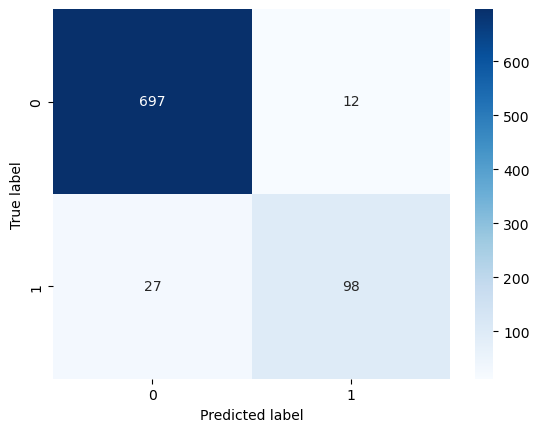

In [294]:
# Plotting confusion matrix
plot_confusion_matrix(y_test, y_pred_xgb_tune, [0,1])

In [295]:
# display scores
print(classification_report(y_test,y_pred_xgb_tune))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       709
           1       0.89      0.78      0.83       125

    accuracy                           0.95       834
   macro avg       0.93      0.88      0.90       834
weighted avg       0.95      0.95      0.95       834



##### ROC

RNN roc_value: 0.8835373765867419
ROC for the test dataset 88.4%


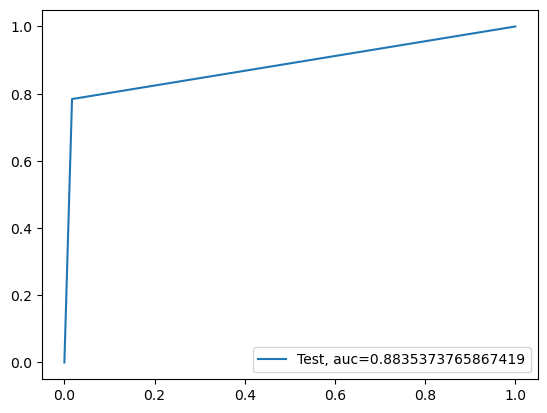

In [296]:
# Make predictions
y_prob = x_gb.predict(X_test_scaled)
y_pred = (y_prob > 0.5).astype(int)

# Calculate evaluation metrics
roc_value = roc_auc_score(y_test, y_prob)
print("RNN roc_value: {0}" .format(roc_value))
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
threshold = thresholds[np.argmax(tpr-fpr)]

roc_auc = auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr, tpr, label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

#### Checking for Overfitting

In [297]:
# Make predictions for test data
y_train_pred_xgb = x_gb.predict(X_train_resampled)
y_test_pred_xgb = x_gb.predict(X_test_scaled)


# Calculate accuracy on the training and test data
train_accuracy = accuracy_score(y_train_resampled, y_train_pred_xgb)
test_accuracy = accuracy_score(y_test, y_test_pred_xgb)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 1.0
Test Accuracy: 0.9532374100719424


**Tuned XGBoost Classifier Observations**

Recall:
* For class 0, which signifies customers who did not churn, the recall is 0.98. This indicates that the model correctly identified 98% of the customers who did not churn out of the total number of customers who actually did not churn.
* For class 1, representing customers who did churn, the recall is 0.78, showing that the model accurately identified 78% of the customers who churned from the total number who actually churned.

Accuracy: With an accuracy of 0.95, the model correctly classified 95% of all customers. It outperforms the Decision Tree Classifier model.

#### Important Features for tuned XGBoost Model

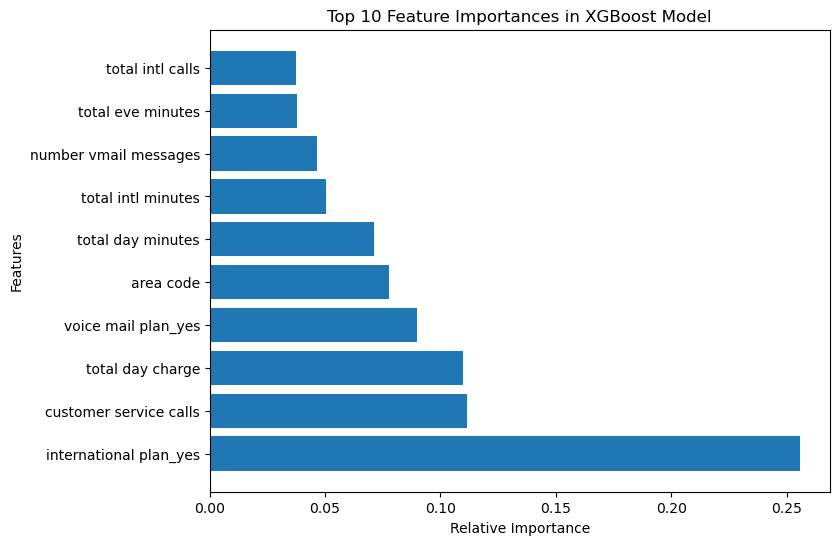

In [298]:
# Assuming 'churn' is the target column, and you want to remove it from churn_df_copy
# You can create a new DataFrame without the 'churn' column
churn_df_copy_without_churn = churn_df_copy.drop('churn', axis=1)

# Get the feature importances from the XGBoost model
importances = x_gb_tune.feature_importances_

# Get the indices to sort the features in descending order of importance
indices = np.argsort(importances)[::-1]

# Get the feature names and importances for the top 10 features
top_n = 10
top_feature_names = churn_df_copy_without_churn.columns[indices[:top_n]]
top_importances = importances[indices][:top_n]

# Plot the top 10 feature importances as a horizontal bar plot
plt.figure(figsize=(8, 6))
plt.barh(range(top_n), top_importances, align='center')
plt.yticks(range(top_n), top_feature_names)
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.title('Top 10 Feature Importances in XGBoost Model')
plt.show()

According to the XGBoost Model, international plan yes, customer service calls, total day charge and voice mail plan_yes are the top most important features contributing to customer churn.

## Conclusion

* **RandomForestClasssifier**
    * The optimized Random Forest Classifier achieved an AUC of 0.88, indicating a strong capability to differentiate between positive (churned) and negative (not churned) instances.   
    * This suggests that the model maintains a good balance between sensitivity (recall) and specificity, accurately identifying a high proportion of both churned and non-churned customers.      
    * The recall values showed slight variation, with the tuned Random Forest Classifier performing marginally better in detecting churned customers, achieving a recall of 82%.
    * The tuned Random Forest Classifier also attained an accuracy of 95%, meaning it correctly classified 95% of the total number of customers.  

* **XGBoost Classifier**
   * Tuned XGBoost Classifier had an AUC of 0.88, it had a recall for class 1 at 78% and an accuracy of 95% 
   
   
* **Picking the best model**
  *Upon a thorough evaluation of the performance metrics for both models, the Tuned Random Forest Classifier proves to be the superior option for accurately identifying churned customers. It achieves a recall of 82%, meaning it correctly detects 82% of customers who have actually churned.

  * Although the Tuned XGBoost Classifier demonstrates a higher overall accuracy of 95% and a recall of 99% for non-churn customers, our main goal is to accurately identify churned customers for effective retention strategies. In this context, the Tuned Random Forest Classifier, with its recall of 82% for churned customers, is more aligned with our objective and thus better suited to our needs.

  * Consequently, we confidently choose the Tuned Random Forest Classifier as our optimal model for predicting customer churn. This selection will help us implement proactive strategies to retain valuable customers and ultimately improve overall business performance.
  
  * Our analysis using the Random Forest Classifier, the most effective model, reveals that the top three factors driving customer churn are the frequency of customer service calls, the total day charges incurred, and the presence of an international plan.

# Summary of Findings

* Majority of customers who terminated their contracts did not have a voicemail plan.
* California and New Jersey exhibit the highest churn rates, both exceeding 25%.
* Customers who terminated their accounts appeared to have subscribed to more day minutes, resulting in higher charges.
* Daytime call and minute charges were notably higher compared to evening and nighttime calls and minutes.
* There is an imbalance between the number of international calls made and the associated charges, with higher charges occurring even with fewer calls.
* Customers with an international plan experience a higher churn rate compared to those without such a plan.

# Recommendation

* Standardize Charging: Implement a more equitable pricing model by aligning charges proportionately across daytime, evening, nighttime and international calls.
* Improve Voicemail Services: Revamp and promote the voicemail plan to make it more attractive to customers.
* Reduce Daytime Costs: Lower the charges associated with daytime calls and minutes to alleviate customer expenses.
* Enhance Customer Service: Invest in and prioritize customer service to better address customer needs and improve retention.